In [1]:
from __future__ import division
from __future__ import 
import numpy as np
import cPickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split

<h3>Artificial Neural Networks in Keras</h3>

In [3]:
# First, we initialize the network - currently the only option is sequential, a linear stack of layers

from keras.models import Sequential
model = Sequential()

In [4]:
# Now that we have our model, we can add layers to it using model.add
from keras.layers.core import Dense

# The first layer should have size input_layer x n
# init determines how the model weights are initialized
# activation determines the activation function
model.add(Dense(4, 32, init="uniform", activation="tanh"))

In [5]:
# the final layer should have an activation function related to the task -
# for example softmax for getting probabilities
# n x output_classes
model.add(Dense(32, 4, init="uniform", activation="softmax"))

In [6]:
#finally we compile the model, specifying the loss function and what optimizer we should use
model.compile(loss='categorical_crossentropy', optimizer="adam")

In [7]:
# now to optimize the model, we simply feed it X, y data of the correct shape
# model.fit(X_train, Y_train, batch_size=32, nb_epoch=1)

<h3>Example - Image Identification</h3>
The Cifar-10 dataset - 10 different image classes.  $32 \times 32$ pixel images, flattened into a vector of 3072 where the first 1024 are red, the next 1024 are blue, and the last 1024 are green.  First we'll try using a multiclass logistic regression - a neural network with no hidden layers and a sigmoid activation function


In [31]:
files = ['cifar-10-batches-py/data_batch_' + str(i) for i in range(1, 6)]
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

batches = map(unpickle, files)
X = np.concatenate([b['data'] for b in batches])
y = np.concatenate([b['labels'] for b in batches])


X_test = map(unpickle, ['cifar-10-batches-py/test_batch'])[0]['data']
y_test = map(unpickle, ['cifar-10-batches-py/test_batch'])[0]['labels']

# Center Image Data
X = X.astype(float)
X = (X - 127) / 256

X_test = X_test.astype(float)
X_test = (X_test - 127) / 256

In [32]:
# For multiclass data we should convert the vector of classes [0, 4, 3, ..] into a vector [0, 0, 0, 1],[1,0,0,0],..
from keras.utils import np_utils
y = np_utils.to_categorical(y)
y_test = np_utils.to_categorical(y_test)
y_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [33]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
# First dimension must be dimension of input shape, last is output shape - 10 classes
model.add(Dense(3072, 10, init="uniform", activation="sigmoid"))

# The parameters of our optimization
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# specify our loss function and provide our optimizer
model.compile(loss='categorical_crossentropy', optimizer=sgd, class_mode='categorical')

# finally, fit the model
model.fit(X, y, batch_size=128, nb_epoch=20, show_accuracy=True, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 0
45000/45000 [==============================] - 4s - loss: 1.8985 - acc.: 0.3271 - val. loss: 1.8316 - val. acc.: 0.3558
Epoch 1
45000/45000 [==============================] - 4s - loss: 1.7987 - acc.: 0.3666 - val. loss: 1.8251 - val. acc.: 0.3604
Epoch 2
45000/45000 [==============================] - 4s - loss: 1.7737 - acc.: 0.3757 - val. loss: 1.8027 - val. acc.: 0.3696
Epoch 3
45000/45000 [==============================] - 2s - loss: 1.7535 - acc.: 0.3825 - val. loss: 1.8321 - val. acc.: 0.3524
Epoch 4
45000/45000 [==============================] - 2s - loss: 1.7420 - acc.: 0.3871 - val. loss: 1.8153 - val. acc.: 0.3780
Epoch 5
45000/45000 [==============================] - 3s - loss: 1.7320 - acc.: 0.3935 - val. loss: 1.8513 - val. acc.: 0.3626
Epoch 6
45000/45000 [==============================] - 3s - loss: 1.7254 - acc.: 0.3918 - val. loss: 1.8225 - val. acc.: 0.3604
Epoch 7
45000/45000 [==============================] - 

In [36]:
model.evaluate(X_test, y_test, show_accuracy=True)

10000/10000 [==============================] - 0s - loss: 1.8693 - acc.: 0.3646    


(1.8689194110632485, 0.36402294303797467)

Overall 37% test accuracy - probably better than random guessing, but not by that much.  Instead lets take advantage of using hidden layers to find more complicated functions

In [37]:
model = Sequential()

model.add(Dense(3072, 256, init="uniform", activation="tanh"))
model.add(Dense(256, 10, init="uniform", activation="softmax"))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, class_mode='categorical')
model.fit(X, y, batch_size=128, nb_epoch=20, show_accuracy=True, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 0
45000/45000 [==============================] - 11s - loss: 1.7834 - acc.: 0.3723 - val. loss: 1.7035 - val. acc.: 0.4194
Epoch 1
45000/45000 [==============================] - 11s - loss: 1.6319 - acc.: 0.4314 - val. loss: 1.6148 - val. acc.: 0.4350
Epoch 2
45000/45000 [==============================] - 13s - loss: 1.5432 - acc.: 0.4593 - val. loss: 1.6004 - val. acc.: 0.4448
Epoch 3
45000/45000 [==============================] - 11s - loss: 1.4844 - acc.: 0.4790 - val. loss: 1.5682 - val. acc.: 0.4584
Epoch 4
45000/45000 [==============================] - 8s - loss: 1.4311 - acc.: 0.4965 - val. loss: 1.5608 - val. acc.: 0.4636
Epoch 5
45000/45000 [==============================] - 8s - loss: 1.3792 - acc.: 0.5150 - val. loss: 1.5584 - val. acc.: 0.4704
Epoch 6
45000/45000 [==============================] - 8s - loss: 1.3429 - acc.: 0.5293 - val. loss: 1.5818 - val. acc.: 0.4650
Epoch 7
45000/45000 [==============================

In [38]:
model.evaluate(X_test, y_test, show_accuracy=True)

10000/10000 [==============================] - 1s - loss: 1.8540 - acc.: 0.4513    


(1.8538956171198258, 0.45371835443037972)

Well, 45% is certainly an improvement, but its still not that great.  We're not really taking advantage of the fact that this is image data.  While we're looking at it as 2073 dimensional data, the actual dimensionality of the data is probably much less, i.e. its close to some manifold.  

Convolutional Neural Networks were designed to take advantage of the sort of image hierarchy -> pixels to edges to shapes to features and so on.  First, we'll need to reshape our data into the proper 3-d format

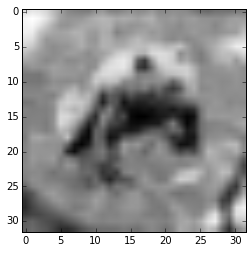

In [89]:
plt.imshow(X[0][:1024].reshape(32, 32), cmap="Greys")

In [99]:
from __future__ import absolute_import
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.utils import np_utils, generic_utils
from six.moves import range

'''
    Train a (fairly simple) deep CNN on the CIFAR10 small images dataset.

    GPU run command:
        THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python cifar10_cnn.py

    It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
    (it's still underfitting at that point, though).

    Note: the data was pickled with Python 2, and some encoding issues might prevent you
    from loading it in Python 3. You might have to load it in Python 2, 
    save it in a different format, load it in Python 3 and repickle it.
'''

batch_size = 32
nb_classes = 10
nb_epoch = 200
data_augmentation = True

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data(test_split=0.1)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(32, 3, 3, 3, border_mode='full')) 
model.add(Activation('relu'))
model.add(Convolution2D(32, 32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 32, 3, 3, border_mode='full')) 
model.add(Activation('relu'))
model.add(Convolution2D(64, 64, 3, 3)) 
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64*8*8, 512, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512, nb_classes, init='normal'))
model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

if not data_augmentation:
    print("Not using data augmentation or normalization")

    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10)
    score = model.evaluate(X_test, Y_test, batch_size=batch_size)
    print('Test score:', score)

else:
    print("Using real time data augmentation")

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=True, # set input mean to 0 over the dataset
        samplewise_center=False, # set each sample mean to 0
        featurewise_std_normalization=True, # divide inputs by std of the dataset
        samplewise_std_normalization=False, # divide each input by its std
        zca_whitening=False, # apply ZCA whitening
        rotation_range=20, # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2, # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
        horizontal_flip=True, # randomly flip images
        vertical_flip=False) # randomly flip images

    # compute quantities required for featurewise normalization 
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)

    for e in range(nb_epoch):
        print('-'*40)
        print('Epoch', e)
        print('-'*40)
        print("Training...")
        # batch train with realtime data augmentation
        progbar = generic_utils.Progbar(X_train.shape[0])
        for X_batch, Y_batch in datagen.flow(X_train, Y_train):
            loss = model.train(X_batch, Y_batch)
            progbar.add(X_batch.shape[0], values=[("train loss", loss)])

        print("Testing...")
        # test time!
        progbar = generic_utils.Progbar(X_test.shape[0])
        for X_batch, Y_batch in datagen.flow(X_test, Y_test):
            score = model.test(X_batch, Y_batch)
            progbar.add(X_batch.shape[0], values=[("test loss", score)])

            


170500096/170498071 [==============================] - 59s    
Untaring file...
45000 train samples
5000 test samples
Using real time data augmentation
----------------------------------------
Epoch 0
----------------------------------------
Training...
3968/45000 [=>............................] - ETA: 4378s - train loss: 2.2332

KeyboardInterrupt: 